In [4]:
# Regular python libraries
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Standar bokeh libraries
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import LinearAxis, Range1d  # Handle two y axis
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import row, column, widgetbox
import warnings
warnings.filterwarnings('ignore')
output_notebook()

Loading BokehJS ...

## Accelerometer Specifications
* Is samplled at 20 Hz - Section 2.1
* Participants wore a device with a tri-axial accelerometer
* On the dominant wirst
* Transmit data using Bluetooth Low Energy
* Several AP in within thw house
* Outputs are non-continuous numerial readings
* Units of g, approximately 9.81 ms^-2
* Also signal strength indications are received (RSSI) at 20 Hz
* RSSI are recorded by each access point (in dBm).
* Accelerometer range +-8g
* Minimal of 110 dBm
* May be missing packets from the data.	

dBm (sometimes dBmW or decibel-milliwatts) is an abbreviation for the power ratio in decibels (dB) of the measured power referenced to one milliwatt (mW). It is used in radio, microwave and fiber-optical networks as a convenient measure of absolute power because of its capability to express both very large and very small values in a short form. Compare dBW, which is referenced to one watt (1000 mW).

* acceleration.csv (available for train and test)

* The acceleration file consists of eight columns:
   1. t: this is the time of the recording (relative to the start of the sequence)
   2. x/y/z: these are the acceleration values recorded on the x/y/z axes of the accelerometer.
   3. Kitchen_AP/Lounge_AP/Upstairs_AP/Study_AP: these specify the received signal strength (RSSI) of the acceleration signal as received by the access kitchen/lounge/upstairs access points. Empty values indicate that the access point did not receive the packet.
   
   
http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [5]:
acc_min = -8
acc_max = 8
ap_min = -110
ap_max = 0

In [6]:
# Read data (from file or DB)
df = pd.read_csv('acceleration.csv',#../Dataset/train/00001/acceleration.csv',# skiprows=5, na_values=NaN,
    sep=',')
#df.head()

## Applying Filters

In [7]:
dfa = df.copy()
len_before = len(dfa.index)
dfz = dfa[((dfa.x > acc_min) < acc_max)][((dfa.y > acc_min) < acc_max)][((dfa.z > acc_min) < acc_max)]\
[((dfa.Kitchen_AP < ap_max) & (dfa.Kitchen_AP > ap_min)) | dfa.Kitchen_AP.isnull()]\
[((dfa.Lounge_AP < ap_max) & (dfa.Lounge_AP > ap_min)) | dfa.Lounge_AP.isnull()]\
[((dfa.Upstairs_AP < ap_max) & (dfa.Upstairs_AP > ap_min)) | dfa.Upstairs_AP.isnull()]\
[((dfa.Study_AP < ap_max) & (dfa.Study_AP > ap_min)) | dfa.Study_AP.isnull()]\
[(dfa.t > 0) & (dfa.t < 30 * 60 * 20)]
len_after = len(dfz.index)
if len_before != len_after:
    print('There were outranged data')
else:
    print('Same!')


Same!


In [8]:
dfz.head()

,t,x,y,z,Kitchen_AP,Lounge_AP,Upstairs_AP,Study_AP
0,0.017856,0.944,-0.280,0.152,-93.0,-95.0,-79.0,NaN
1,0.067904,0.944,-0.292,0.156,-93.0,-95.0,-79.0,NaN
2,0.117952,0.946,-0.286,0.156,-93.0,-95.0,-79.0,NaN
3,0.168000,0.942,-0.288,0.160,-93.0,-95.0,-79.0,NaN
4,0.217856,0.946,-0.286,0.158,-90.0,-89.0,-79.0,NaN


## Timedeltas for resampling

In [9]:
# Setting column 't' as timedeltaindex
dfb = dfz.copy()
dfb['t'] = pd.to_timedelta(dfb['t'],unit='s')
dfb = dfb.set_index(pd.TimedeltaIndex(dfb['t']))
del dfb['t']
len(dfb)

35710

In [10]:
#dfb[14830:14857]
#dfb.plot()

## Resampling

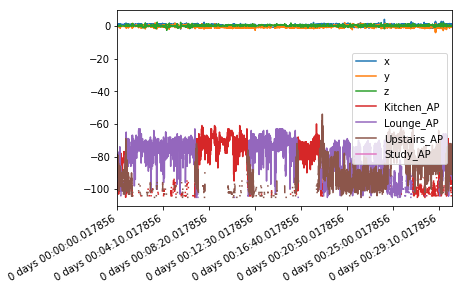

In [11]:
sampleps = 20
freq = str(int(1000/sampleps))+'L'
dfc = dfb.resample(freq).pad()
dfb = dfc.copy()
len(dfc)
dfb.plot( x_compat=True)